Alexander Rodriguez                            Class Project                                                RIN: 662013581

Date	Price	Open	High	Low	Vol.	Change %


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Raw Historical Data 
df = pd.read_csv('Bitcoin_Historical_Data_Investing.csv')
display(df)

,Date,Price,Open,High,Low,Vol.,Change %
0,23-Mar-23,"28,144.00","27,262.80","28,734.10","27,144.60",160.43K,3.24%
1,22-Mar-23,"27,261.70","28,114.20","28,760.30","26,668.70",262.03K,-3.03%
2,21-Mar-23,"28,114.00","27,719.80","28,437.80","27,350.60",438.78K,1.42%
3,20-Mar-23,"27,720.50","27,958.90","28,457.80","27,157.00",503.90K,-0.85%
4,19-Mar-23,"27,958.70","26,914.50","28,347.30","26,844.60",393.27K,3.88%
...,...,...,...,...,...,...,...
4627,22-Jul-10,0.1,0.1,0.1,0.1,2.16K,0.00%
4628,21-Jul-10,0.1,0.1,0.1,0.1,0.58K,0.00%
4629,20-Jul-10,0.1,0.1,0.1,0.1,0.26K,0.00%
4630,19-Jul-10,0.1,0.1,0.1,0.1,0.57K,0.00%


In [3]:
# Updated Data Column to Numerical Values
df['Date'] = pd.to_datetime(df['Date'])
display(df)

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-03-23,"28,144.00","27,262.80","28,734.10","27,144.60",160.43K,3.24%
1,2023-03-22,"27,261.70","28,114.20","28,760.30","26,668.70",262.03K,-3.03%
2,2023-03-21,"28,114.00","27,719.80","28,437.80","27,350.60",438.78K,1.42%
3,2023-03-20,"27,720.50","27,958.90","28,457.80","27,157.00",503.90K,-0.85%
4,2023-03-19,"27,958.70","26,914.50","28,347.30","26,844.60",393.27K,3.88%
...,...,...,...,...,...,...,...
4627,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
4628,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4629,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4630,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%


In [4]:
# Updated DataFrame to go from Decending Order to Acending Order
df = df.sort_values(by='Date', ascending=True)
display(df)

,Date,Price,Open,High,Low,Vol.,Change %
4631,2010-07-18,0.1,0,0.1,0.1,0.08K,0.00%
4630,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
4629,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4628,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4627,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...
4,2023-03-19,"27,958.70","26,914.50","28,347.30","26,844.60",393.27K,3.88%
3,2023-03-20,"27,720.50","27,958.90","28,457.80","27,157.00",503.90K,-0.85%
2,2023-03-21,"28,114.00","27,719.80","28,437.80","27,350.60",438.78K,1.42%
1,2023-03-22,"27,261.70","28,114.20","28,760.30","26,668.70",262.03K,-3.03%


In [5]:
# Removed the commas from the Price Column 
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
 
display(df)

,Date,Price,Open,High,Low,Vol.,Change %
4631,2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
4630,2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
4629,2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
4628,2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
4627,2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...,...
4,2023-03-19,27958.7,26914.5,28347.3,26844.6,393.27K,3.88%
3,2023-03-20,27720.5,27958.9,28457.8,27157.0,503.90K,-0.85%
2,2023-03-21,28114.0,27719.8,28437.8,27350.6,438.78K,1.42%
1,2023-03-22,27261.7,28114.2,28760.3,26668.7,262.03K,-3.03%


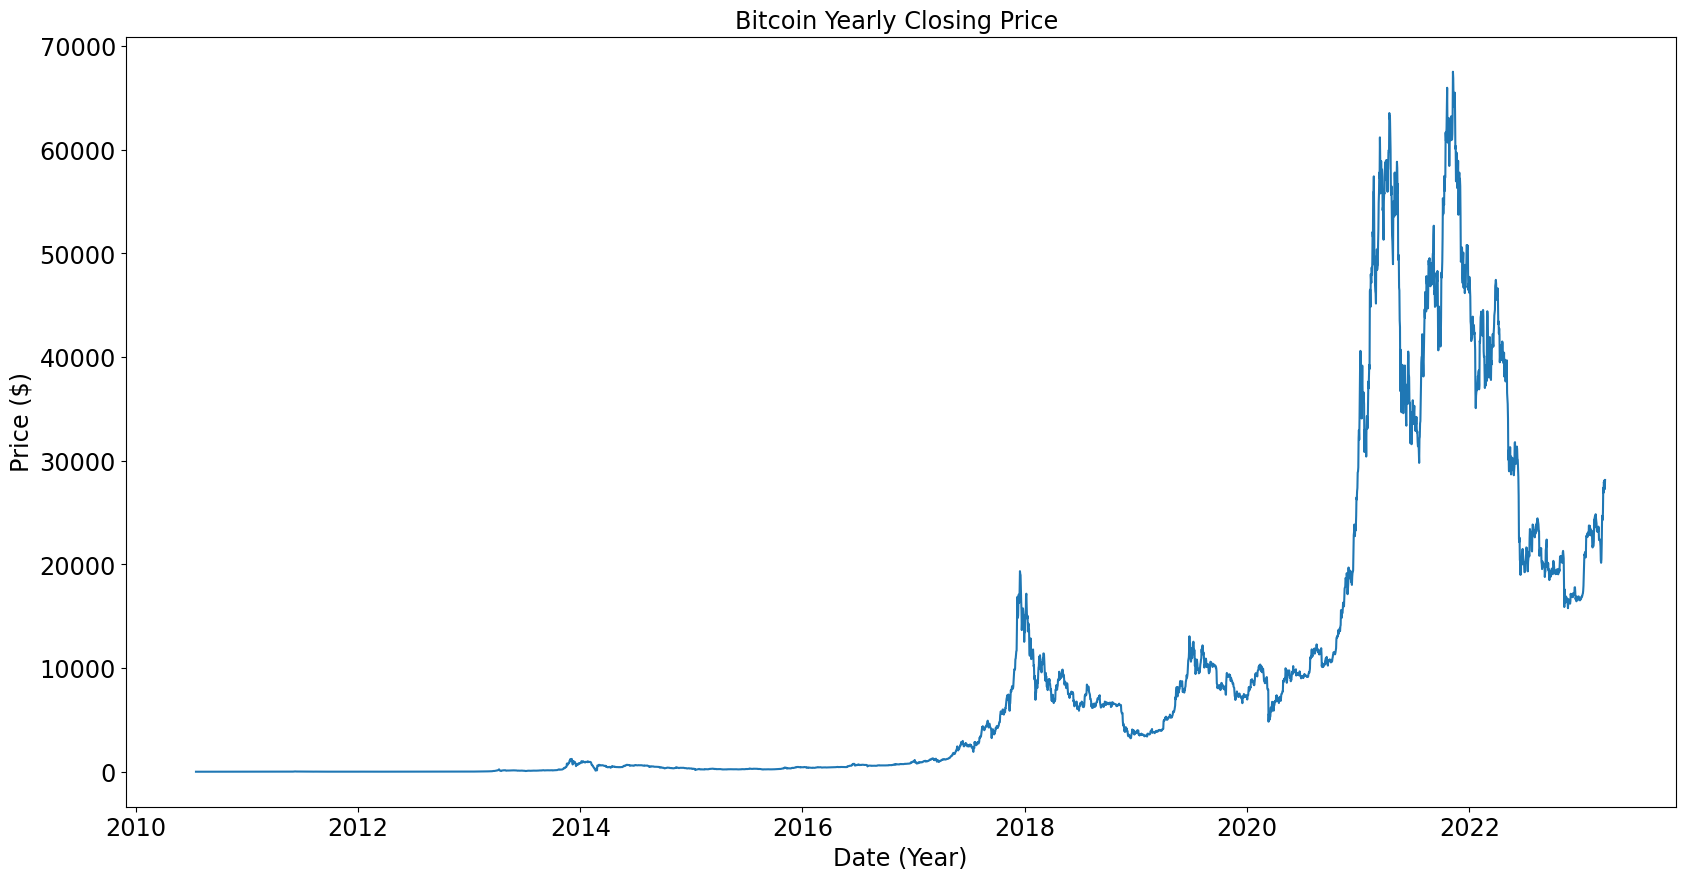

In [6]:
# PLotted Historical Data from Start to Present (2010-2023)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df[:]['Date'], df[:]['Price'])
plt.xlabel('Date (Year)', fontsize='xx-large')
plt.ylabel('Price ($)', fontsize='xx-large')
plt.title('Bitcoin Yearly Closing Price ', fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.show()



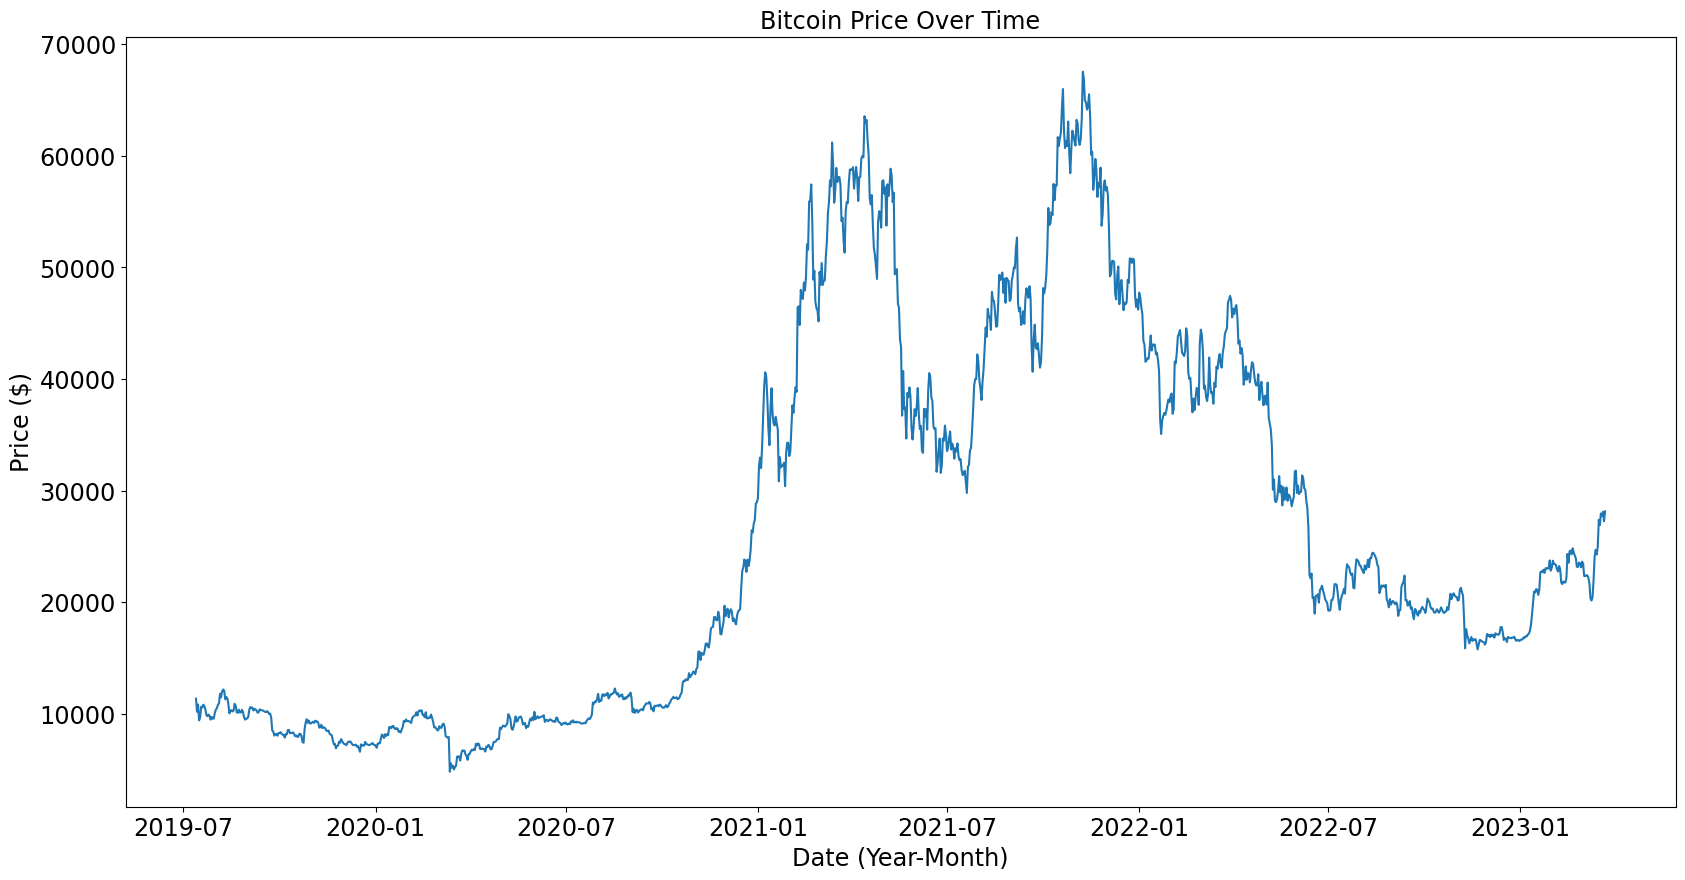

In [7]:
# Plotted Historical Data from the last 1,350 days
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df[-1350:]['Date'], df[-1350:]['Price'])
plt.xlabel('Date (Year-Month)', fontsize='xx-large')
plt.ylabel('Price ($)', fontsize='xx-large')
plt.title('Bitcoin Price Over Time', fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.show()

In [8]:
# Extracted the Price Columns from the DataFrame
Price_Ex = df.filter(['Price','Open','High','Low'])
display(Price_Ex)

,Price,Open,High,Low
4631,0.1,0.0,0.1,0.1
4630,0.1,0.1,0.1,0.1
4629,0.1,0.1,0.1,0.1
4628,0.1,0.1,0.1,0.1
4627,0.1,0.1,0.1,0.1
...,...,...,...,...
4,27958.7,26914.5,28347.3,26844.6
3,27720.5,27958.9,28457.8,27157.0
2,28114.0,27719.8,28437.8,27350.6
1,27261.7,28114.2,28760.3,26668.7


In [9]:
# Normalization Funciton
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
# Normalized Bitcoin Price Data
scaled_data = scaler.fit_transform(Price_Ex)
display(scaled_data)
print('scaled_data.shape = ', scaled_data.shape)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.50750208e-06],
       [0.00000000e+00, 1.48085185e-06, 0.00000000e+00, 1.50750208e-06],
       [0.00000000e+00, 1.48085185e-06, 0.00000000e+00, 1.50750208e-06],
       ...,
       [4.16330756e-01, 4.10489170e-01, 4.12197332e-01, 4.12310865e-01],
       [4.03709287e-01, 4.16329649e-01, 4.16871888e-01, 4.02031208e-01],
       [4.16775017e-01, 4.03721677e-01, 4.16492126e-01, 4.09205411e-01]])

scaled_data.shape =  (4632, 4)


In [11]:
# training_data is assigned 70% of the scaled price data and test_data is assigned 30% o fthe scaled price data
train_size = int(len(scaled_data) * 0.7)
training_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
print('training_data.shape = ', training_data.shape)
print('test_data.shape = ', test_data.shape)

training_data.shape =  (3242, 4)
test_data.shape =  (1390, 4)


In [12]:
def create_sequences(Price_Ex, sequence_length):    
    # Initialize empty lists for the input and output data (X and y).
    X, y = [], []
    
    # Loop through the length of the input data minus the sequence length. 
    # This is because we need to create sequences of length sequence_length, 
    # so we cannot include the last sequence_length elements of the input data.    
    # For each iteration of the loop, append a sequence of length sequence_length to the input data list X, 
    # starting from the current index i and ending at i+sequence_length.
    # Append the next element in the input data to the output data list y, 
    # which corresponds to the next value in the time series after the end of the sequence.    
    for i in range(len(Price_Ex) - sequence_length):
        X.append(Price_Ex[i:(i+sequence_length), :])
        y.append(Price_Ex[i+sequence_length, :])
        
    # Return the input data X and output data y as numpy arrays.
    return np.array(X), np.array(y)

In [13]:
# In this example, sequence_length is set to 40, 
# meaning that each sequence in the data_seq variable will consist
# of the previous 40 days of Bitcoin prices.
sequence_length = 40

# It is worth noting that X_test contains more elements than the original Bitcoin price data because 
# it includes the last sequence_length days of Bitcoin prices, 
# whereas the original data only includes the historical Bitcoin prices. 
# This is because we need to use the previous sequence_length days of Bitcoin prices to make a 
# prediction for the next day's price. Therefore, when testing the trained RNN model, 
# we also need to provide it with sequence_length days of historical data.
X_train, y_train = create_sequences(training_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (3202, 40, 4)
y_train.shape =  (3202, 4)
X_test.shape =  (1350, 40, 4)
y_test.shape =  (1350, 4)


In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=40, return_sequences=True))
model.add(LSTM(units=40))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the modle
history = model.fit(X_train, y_train, epochs=100, batch_size=45, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
72/72 - 6s - loss: 3.4062e-04 - val_loss: 0.0072 - 6s/epoch - 81ms/step
Epoch 2/100
72/72 - 2s - loss: 6.5968e-05 - val_loss: 0.0093 - 2s/epoch - 22ms/step
Epoch 3/100
72/72 - 2s - loss: 7.1703e-05 - val_loss: 0.0112 - 2s/epoch - 22ms/step
Epoch 4/100
72/72 - 2s - loss: 5.6107e-05 - val_loss: 0.0074 - 2s/epoch - 23ms/step
Epoch 5/100
72/72 - 2s - loss: 5.1076e-05 - val_loss: 0.0105 - 2s/epoch - 22ms/step
Epoch 6/100
72/72 - 2s - loss: 4.0500e-05 - val_loss: 0.0114 - 2s/epoch - 23ms/step
Epoch 7/100
72/72 - 2s - loss: 3.8436e-05 - val_loss: 0.0117 - 2s/epoch - 23ms/step
Epoch 8/100
72/72 - 2s - loss: 3.8396e-05 - val_loss: 0.0061 - 2s/epoch - 23ms/step
Epoch 9/100
72/72 - 2s - loss: 3.6451e-05 - val_loss: 0.0089 - 2s/epoch - 22ms/step
Epoch 10/100
72/72 - 2s - loss: 2.9502e-05 - val_loss: 0.0089 - 2s/epoch - 23ms/step
Epoch 11/100
72/72 - 2s - loss: 2.7351e-05 - val_loss: 0.0053 - 2s/epoch - 23ms/step
Epoch 12/100
72/72 - 2s - loss: 2.6498e-05 - val_loss: 0.0077 - 2s/epoch -

Epoch 98/100
72/72 - 2s - loss: 6.3119e-06 - val_loss: 0.0024 - 2s/epoch - 23ms/step
Epoch 99/100
72/72 - 2s - loss: 7.5367e-06 - val_loss: 0.0023 - 2s/epoch - 22ms/step
Epoch 100/100
72/72 - 2s - loss: 7.0587e-06 - val_loss: 0.0026 - 2s/epoch - 23ms/step


In [15]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)

43/43 [==============================] - 0s 6ms/step - loss: 0.0026
Train Loss: 5.601205430139089e-06
Test Loss: 0.002559345681220293


In [16]:
# Model Predictions
train_predict = model.predict(X_train)
print('train_predict.shape = ', train_predict.shape)

test_predict = model.predict(X_test)
print('test_predict.shape = ', test_predict.shape)

# Invert the normalization to get the actual prices
train_predict = np.column_stack((train_predict, np.zeros(train_predict.shape), np.zeros(train_predict.shape), np.zeros(train_predict.shape)))
train_predict = scaler.inverse_transform(train_predict)
print('train_predict.shape = ', train_predict.shape)

test_predict = np.column_stack((test_predict, np.zeros(test_predict.shape), np.zeros(test_predict.shape), np.zeros(test_predict.shape)))
test_predict = scaler.inverse_transform(test_predict)
print('test_predict.shape = ', test_predict.shape)

y_train = scaler.inverse_transform(y_train)
print('y_train.shape = ', y_train.shape)

y_test = scaler.inverse_transform(y_test)
print('y_test.shape = ', y_test.shape)

101/101 [==============================] - 1s 6ms/step
train_predict.shape =  (3202, 1)
43/43 [==============================] - 0s 6ms/step
test_predict.shape =  (1350, 1)
train_predict.shape =  (3202, 4)
test_predict.shape =  (1350, 4)
y_train.shape =  (3202, 4)
y_test.shape =  (1350, 4)


In [17]:
# Evaluate the model
train_score = np.sqrt(np.mean(np.power((y_train - train_predict), 2)))
print('Train Score: %.2f RMSE' % (train_score))

Train Score: 3004.80 RMSE


In [18]:
# A higher R-squared value indicates a better fit of the regression model to the data. Ranges from (0-1).
r2 = r2_score(y_test[:, 0], test_predict[:, 0])
print('R-squared score: %.2f' % r2)

mse = mean_squared_error(y_test[:, 0], test_predict[:, 0])
print('Mean squared error: %.2f' % mse)

mae = mean_absolute_error(y_test[:, 0], test_predict[:, 0])
print('Mean absolute error: %.2f' % mae)

R-squared score: 0.96
Mean squared error: 12525742.86
Mean absolute error: 2118.26


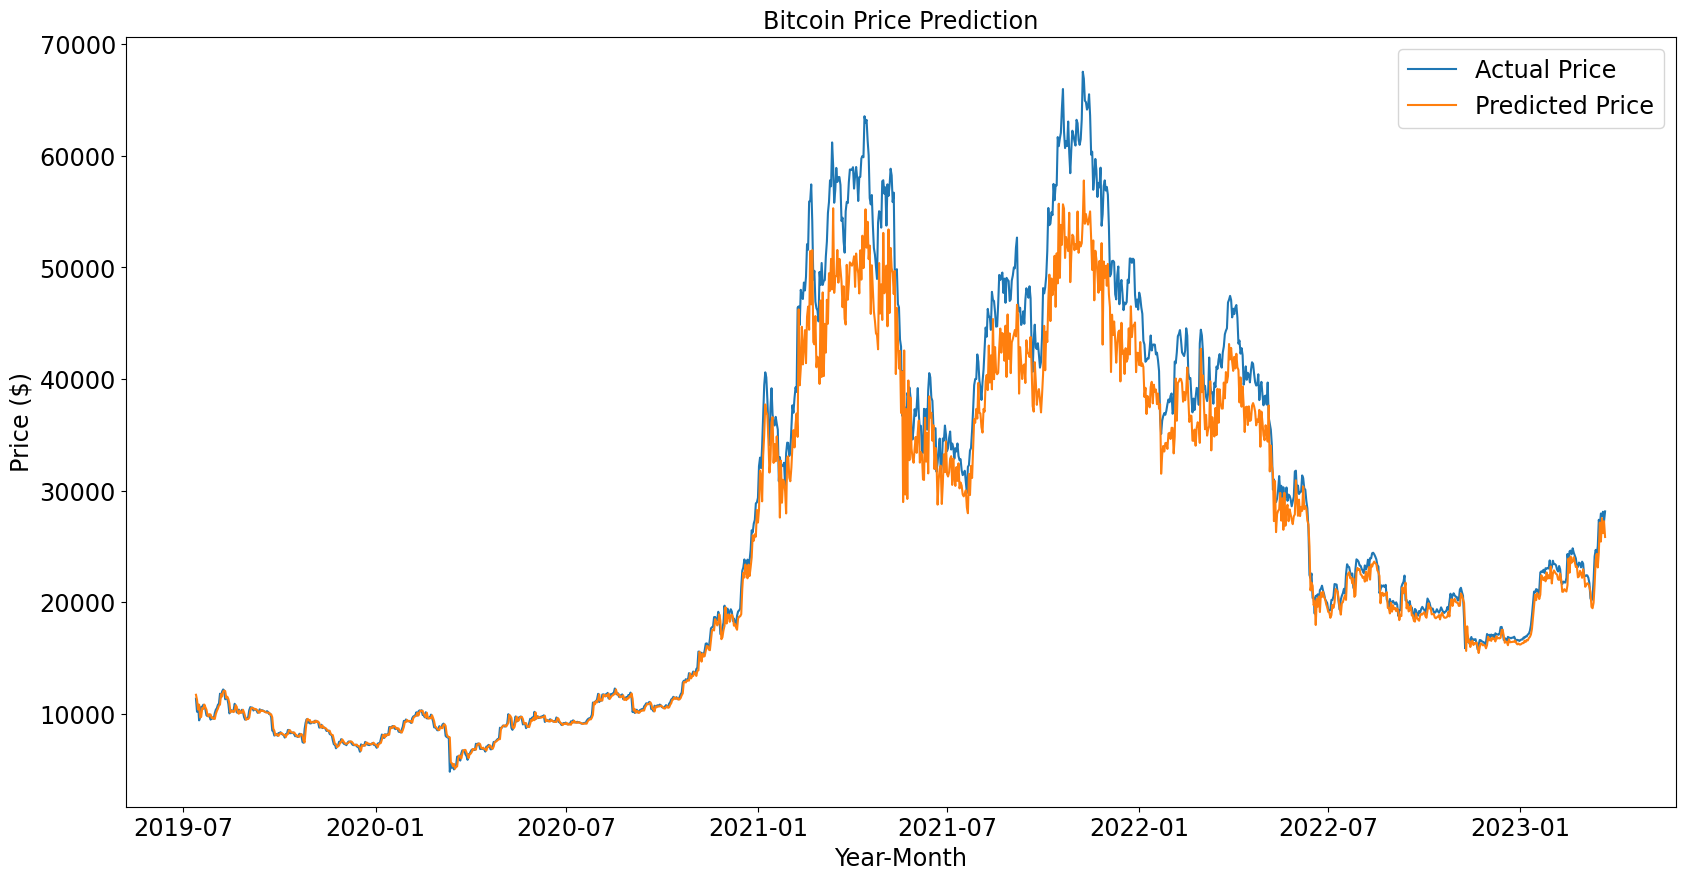

In [19]:
# Plot the predicted prices
plt.figure(figsize=(20,10))
plt.plot(df[-len(test_predict):]['Date'], y_test[:, 0], label='Actual Price')
plt.plot(df[-len(test_predict):]['Date'], test_predict[:, 0], label='Predicted Price')
plt.title('Bitcoin Price Prediction',fontsize='xx-large')
plt.xlabel('Year-Month',fontsize='xx-large')
plt.ylabel('Price ($)',fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.show()

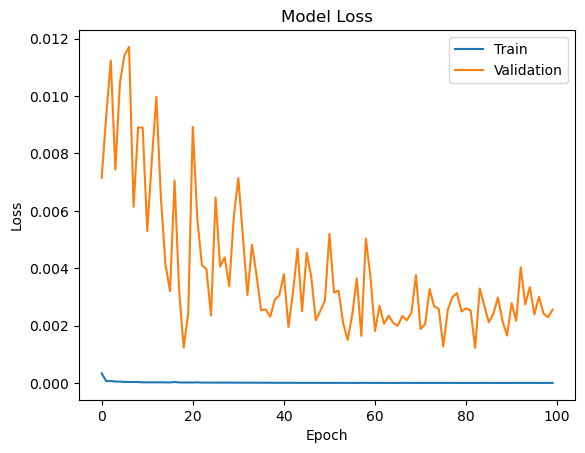

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [21]:
display(Price_Ex.iloc[-30:, 0].values)

array([24186.6, 23936.3, 23191.5, 23166.1, 23558.7, 23494.1, 23130.5,
       23642.2, 23465.4, 22354.4, 22347.1, 22428.3, 22410. , 22197.8,
       21710.8, 20361.8, 20156.7, 20467.5, 21994.8, 24114.4, 24699.7,
       24282.7, 25004.1, 27391.8, 26914.5, 27958.7, 27720.5, 28114. ,
       27261.7, 28144. ])

In [22]:
print(Price_Ex.shape)

(4632, 4)


In [23]:
# Get the most recent 30 days of Bitcoin prices
last_30_days = Price_Ex.iloc[-30:, 0:].values
print(last_30_days.shape)
last_30_days = scaler.transform(last_30_days)

# Initialize an empty list to store the predicted prices
predictions = []

# Loop through the next 60 days
for i in range(60):
    # Create a sequence of 30 consecutive days of Bitcoin prices
    X = np.array(last_30_days[-30:,0:])
    # Reshape the sequence to have a shape of (1, 30, 4)
    X = np.reshape(X, (1, 30, 4))
    # Use the LSTM model to predict the price for the next day
    y_pred = model.predict(X)
    # Invert the normalization to get the actual price
    y_pred = np.column_stack((y_pred, np.zeros(y_pred.shape), np.zeros(y_pred.shape), np.zeros(y_pred.shape)))
    y_pred = scaler.inverse_transform(y_pred)
    # Append the predicted price to the list of predictions
    predictions.append(y_pred[0][0])
    # Append the actual price to the sequence and remove the first element
    last_30_days = np.append(last_30_days, scaler.transform(Price_Ex.iloc[-60+i,:].values.reshape(1,-1)), axis=0)[1:]



(30, 4)


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 15ms/step


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 17ms/step


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 15ms/step


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 16ms/step


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


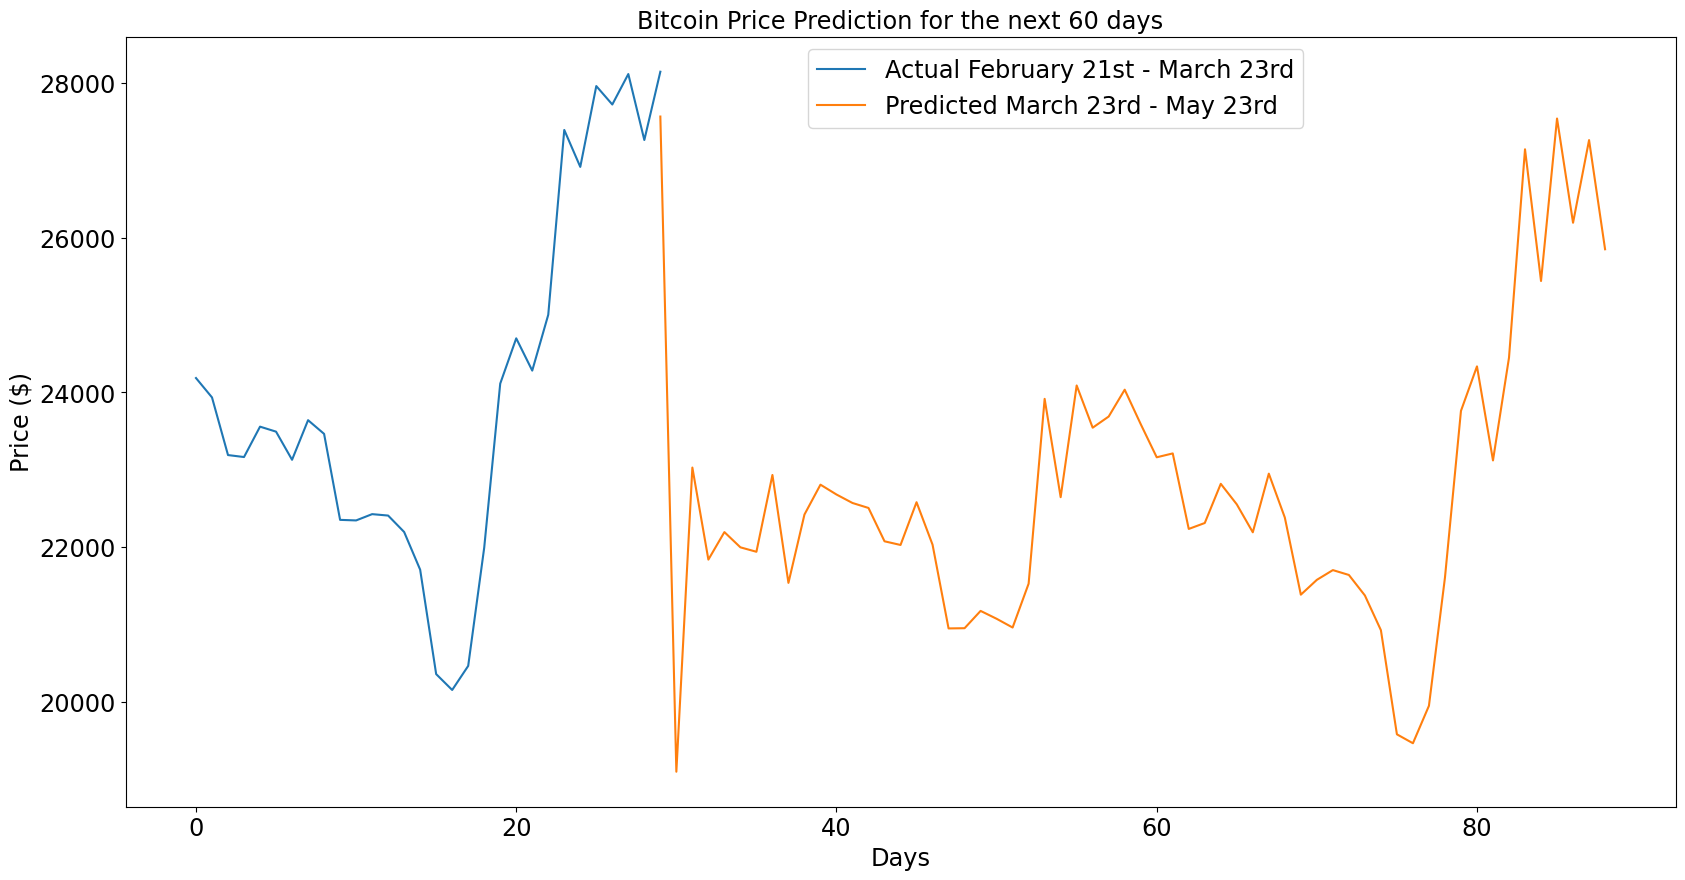

In [24]:
# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(Price_Ex.iloc[-30:, 0].values, label='Actual February 21st - March 23rd')
plt.plot(range(29, 89), predictions, label='Predicted March 23rd - May 23rd')
plt.title('Bitcoin Price Prediction for the next 60 days',fontsize='xx-large')
plt.xlabel('Days',fontsize='xx-large')
plt.ylabel('Price ($)',fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.legend(fontsize='xx-large', loc='upper center', bbox_to_anchor=(0.60, 1))

In [25]:
# Raw Historical Data 
df2 = pd.read_csv('Bitcoin_Historical_Data_Investing_March_April_2023.csv')
display(df2)

,Date,Price,Open,High,Low,Vol.,Change %
0,23-Apr-23,"27,591.40","27,813.80","27,815.00","27,388.50",41.77K,-0.80%
1,22-Apr-23,"27,813.90","27,264.80","27,872.00","27,165.70",44.30K,2.01%
2,21-Apr-23,"27,264.80","28,240.50","28,353.40","27,171.10",98.72K,-3.46%
3,20-Apr-23,"28,240.50","28,813.70","29,082.10","28,032.40",95.45K,-1.99%
4,19-Apr-23,"28,813.70","30,382.20","30,408.40","28,641.10",111.27K,-5.16%
5,18-Apr-23,"30,382.20","29,434.10","30,470.10","29,149.20",76.58K,3.22%
6,17-Apr-23,"29,434.90","30,310.80","30,312.20","29,274.00",71.90K,-2.89%
7,16-Apr-23,"30,310.30","30,299.20","30,545.30","30,134.60",34.48K,0.04%
8,15-Apr-23,"30,299.60","30,472.60","30,586.50","30,208.80",31.71K,-0.57%
9,14-Apr-23,"30,472.50","30,387.40","30,964.90","30,026.00",98.38K,0.28%


In [26]:
# Updated Data Column to Numerical Values
df2['Date'] = pd.to_datetime(df2['Date'])
display(df2)

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-23,"27,591.40","27,813.80","27,815.00","27,388.50",41.77K,-0.80%
1,2023-04-22,"27,813.90","27,264.80","27,872.00","27,165.70",44.30K,2.01%
2,2023-04-21,"27,264.80","28,240.50","28,353.40","27,171.10",98.72K,-3.46%
3,2023-04-20,"28,240.50","28,813.70","29,082.10","28,032.40",95.45K,-1.99%
4,2023-04-19,"28,813.70","30,382.20","30,408.40","28,641.10",111.27K,-5.16%
5,2023-04-18,"30,382.20","29,434.10","30,470.10","29,149.20",76.58K,3.22%
6,2023-04-17,"29,434.90","30,310.80","30,312.20","29,274.00",71.90K,-2.89%
7,2023-04-16,"30,310.30","30,299.20","30,545.30","30,134.60",34.48K,0.04%
8,2023-04-15,"30,299.60","30,472.60","30,586.50","30,208.80",31.71K,-0.57%
9,2023-04-14,"30,472.50","30,387.40","30,964.90","30,026.00",98.38K,0.28%


In [27]:
# Updated DataFrame to go from Decending Order to Acending Order
df2 = df2.sort_values(by='Date', ascending=True)
display(df2)

,Date,Price,Open,High,Low,Vol.,Change %
31,2023-03-23,"28,310.70","27,262.80","28,734.10","27,144.60",158.46K,3.85%
30,2023-03-24,"27,462.20","28,306.90","28,374.50","27,026.50",110.36K,-3.00%
29,2023-03-25,"27,475.60","27,462.20","27,761.90","27,176.70",61.36K,0.05%
28,2023-03-26,"27,973.50","27,474.90","28,153.70","27,429.10",60.64K,1.81%
27,2023-03-27,"27,129.80","27,974.80","28,023.30","26,611.50",107.24K,-3.02%
26,2023-03-28,"27,262.20","27,127.80","27,465.00","26,665.60",94.16K,0.49%
25,2023-03-29,"28,350.40","27,262.90","28,627.40","27,249.80",109.32K,3.99%
24,2023-03-30,"28,029.50","28,350.30","29,160.40","27,716.70",122.51K,-1.13%
23,2023-03-31,"28,473.70","28,029.30","28,646.30","27,587.50",98.44K,1.58%
22,2023-04-01,"28,456.10","28,473.70","28,795.10","28,285.60",38.09K,-0.06%


In [28]:
# Removed the commas from the Price Column 
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Price'] = df2['Price'].str.replace(',', '').astype(float)
df2['Open'] = df2['Open'].str.replace(',', '').astype(float)
df2['High'] = df2['High'].str.replace(',', '').astype(float)
df2['Low'] = df2['Low'].str.replace(',', '').astype(float)
 
display(df2)

,Date,Price,Open,High,Low,Vol.,Change %
31,2023-03-23,28310.7,27262.8,28734.1,27144.6,158.46K,3.85%
30,2023-03-24,27462.2,28306.9,28374.5,27026.5,110.36K,-3.00%
29,2023-03-25,27475.6,27462.2,27761.9,27176.7,61.36K,0.05%
28,2023-03-26,27973.5,27474.9,28153.7,27429.1,60.64K,1.81%
27,2023-03-27,27129.8,27974.8,28023.3,26611.5,107.24K,-3.02%
26,2023-03-28,27262.2,27127.8,27465.0,26665.6,94.16K,0.49%
25,2023-03-29,28350.4,27262.9,28627.4,27249.8,109.32K,3.99%
24,2023-03-30,28029.5,28350.3,29160.4,27716.7,122.51K,-1.13%
23,2023-03-31,28473.7,28029.3,28646.3,27587.5,98.44K,1.58%
22,2023-04-01,28456.1,28473.7,28795.1,28285.6,38.09K,-0.06%


In [29]:
# Extracted the Price Columns from the DataFrame
March_April = df2.filter(['Price'])
display(March_April)

,Price
31,28310.7
30,27462.2
29,27475.6
28,27973.5
27,27129.8
26,27262.2
25,28350.4
24,28029.5
23,28473.7
22,28456.1


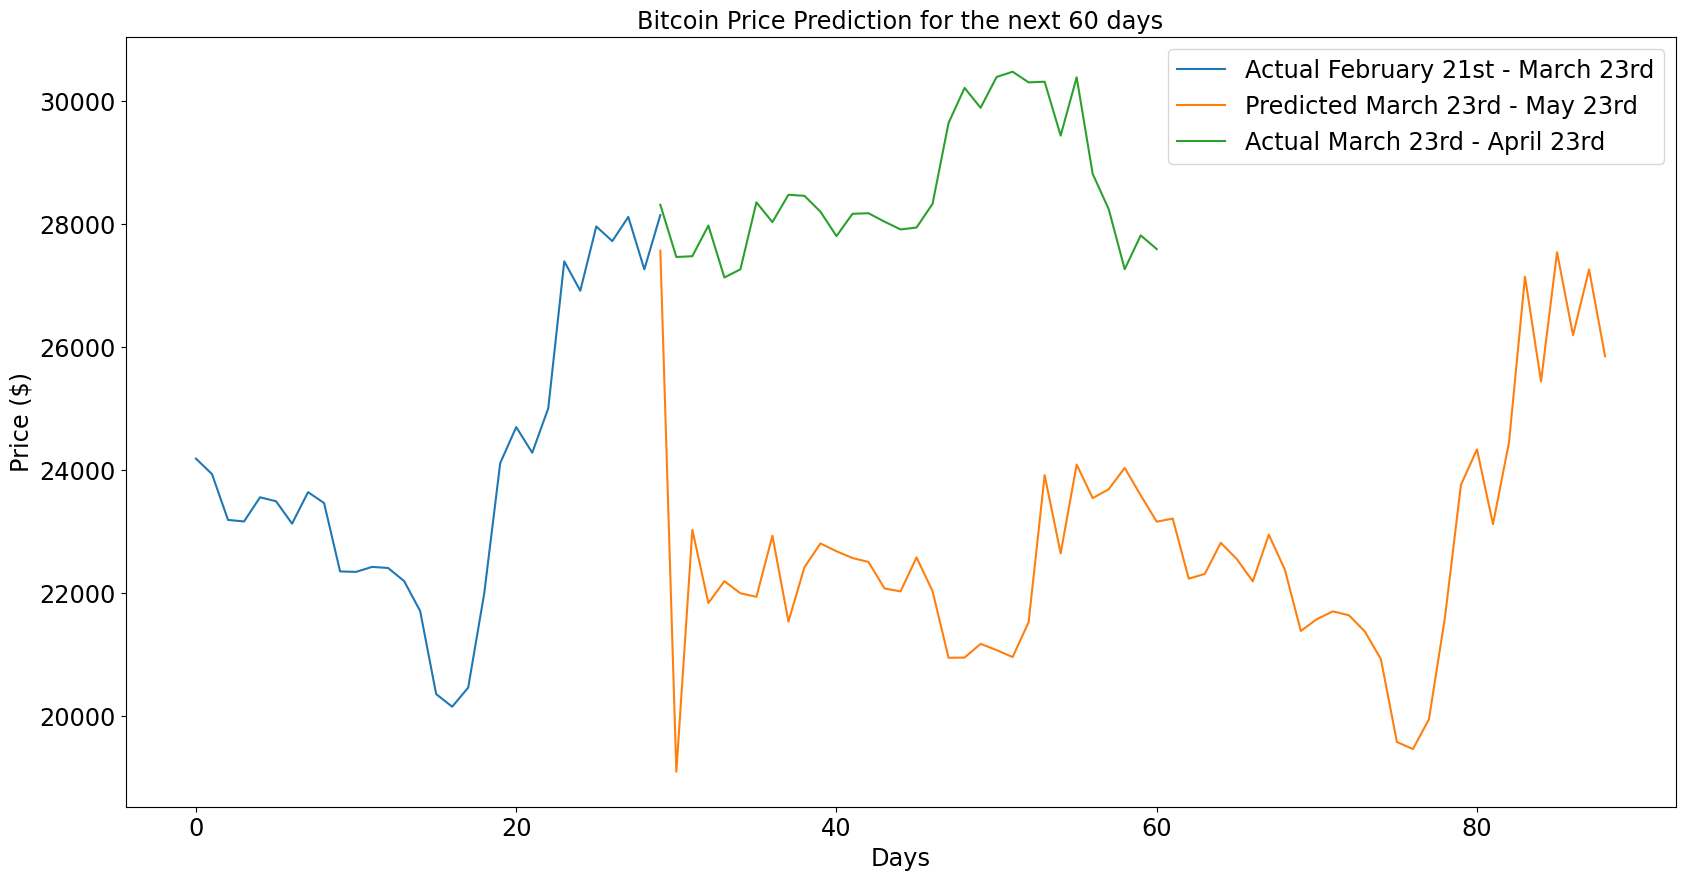

In [30]:
# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(Price_Ex.iloc[-30:, 0].values, label='Actual February 21st - March 23rd')
plt.plot(range(29, 89), predictions, label='Predicted March 23rd - May 23rd')
plt.plot(range(29, 61), March_April.iloc[:, 0], label='Actual March 23rd - April 23rd')
plt.title('Bitcoin Price Prediction for the next 60 days',fontsize='xx-large')
plt.xlabel('Days',fontsize='xx-large')
plt.ylabel('Price ($)',fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.legend(fontsize='xx-large')